The following code contains all functions and graph used for Abhigyan Prakash's Bachelor thesis, "Studying the Isotropy of the Universe: A Deeper Look Through Understanding the Aberration of Light", at Ecole Polytechnique in the year 2024.

Original angle:  0.7853981633974483
Aberrated angle:  0.7169631113427543


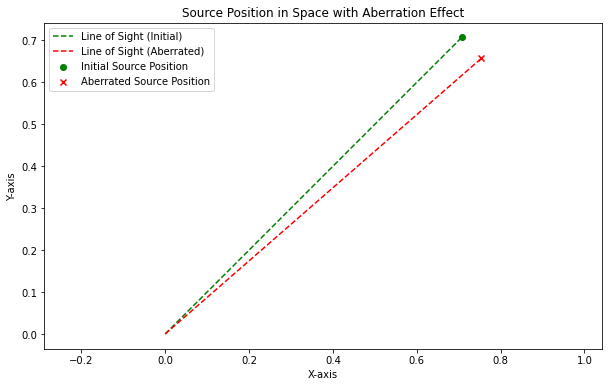

In [1]:
#A simple aberration model in 2 dimensions
import numpy as np
import matplotlib.pyplot as plt

def aberration_effect(theta, velocity):
    sol = 3 * 10**8
    ga = 1 / np.sqrt(1 - (velocity**2 / sol**2))
    
    cos_phi = (np.cos(theta) + (velocity / sol)) / (1 + (velocity / sol) * np.cos(theta))
    phi = np.arccos(cos_phi)
    
    return phi


theta_source = np.radians(45)  
r = 1.0  


source_position = np.array([r * np.cos(theta_source), r * np.sin(theta_source)])


velocity = 30000000

phi_source = aberration_effect(theta_source, velocity)

print("Original angle: ", theta_source)
print("Aberrated angle: ", phi_source)

aberrated_position = np.array([r * np.cos(phi_source), r * np.sin(phi_source)])

plt.figure(figsize=(10,6))
plt.scatter(*source_position, label='Initial Source Position', marker='o', color='green')
plt.scatter(*aberrated_position, label='Aberrated Source Position', marker='x', color='red')
plt.plot([0, source_position[0]], [0, source_position[1]], linestyle='--', color='green', label='Line of Sight (Initial)')
plt.plot([0, aberrated_position[0]], [0, aberrated_position[1]], linestyle='--', color='red', label='Line of Sight (Aberrated)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Source Position in Space with Aberration Effect')
plt.axis('equal')  
plt.show()


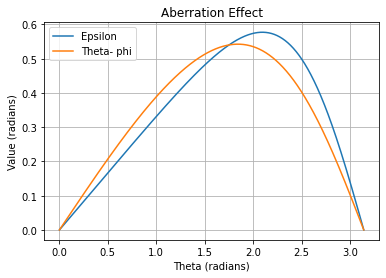

In [2]:
#Plotting the difference of phi and theta and comparing with approximation of epsillon
import numpy as np
import matplotlib.pyplot as plt

def aberration_effect(theta, velocity):
    sol = 3 * 10**8
    ga = 1 / np.sqrt(1 - (velocity**2 / sol**2))
    b = velocity / sol
    
    e = (b*np.sin(theta)) / (1 + b* np.cos(theta))
    return e

def aberration_effect2(theta, velocity):
    sol = 3 * 10**8
    ga = 1 / np.sqrt(1 - (velocity**2 / sol**2))
    b = velocity / sol
    cos_phi = (np.cos(theta) + (velocity / sol)) / (1 + (velocity / sol) * np.cos(theta))
    phi = np.arccos(cos_phi)
    
    return theta - phi

theta_values = np.linspace(0, np.pi, 1000)
velocity = 0.5* 3e8 

eps = aberration_effect(theta_values, velocity)
aber = aberration_effect2(theta_values, velocity)

plt.plot(theta_values, eps, label='Epsilon')
plt.plot(theta_values, aber, label='Theta- phi')
plt.xlabel('Theta (radians)')
plt.ylabel('Value (radians)')
plt.title('Aberration Effect')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
#Graph that plots the aberrated angle against original angle. Able to change velocity to see live effect.
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def aberration_effect(theta, velocity):
    sol = 3 * 10**8
    ga = 1 / np.sqrt(1 - (velocity**2))
    theta_rad = (theta * (np.pi / (180 * 3600)))
    cos_phi = (np.cos(theta_rad) + (velocity)) / (1 + (velocity) * np.cos(theta_rad))
    phi = np.arccos(cos_phi) * ((180 * 3600) / np.pi)
    
    return phi

theta_values = np.linspace(0, 50, 10)

def update_plot(velocity):
    phi_values = [aberration_effect(theta, velocity) for theta in theta_values]

    plt.figure(figsize=(20,12))
    plt.plot(theta_values, phi_values, marker='o', label='Aberrated')
    plt.plot(theta_values, theta_values, label='at v=0')
    plt.xlabel('Theta (arc seconds)')
    plt.ylabel('Phi (arc seconds)')
    plt.title('Aberration Effect: Theta vs Phi (Velocity: {:.2f}c)'.format(velocity))
    plt.legend()
    plt.grid(True)
    plt.show()

velocity_slider = widgets.FloatSlider(value=0.5, min=0.0, max=1, step=0.01, description='Velocity (c):')
widgets.interactive(update_plot, velocity=velocity_slider)


interactive(children=(FloatSlider(value=0.5, description='Velocity (c):', max=1.0, step=0.01), Output()), _dom…

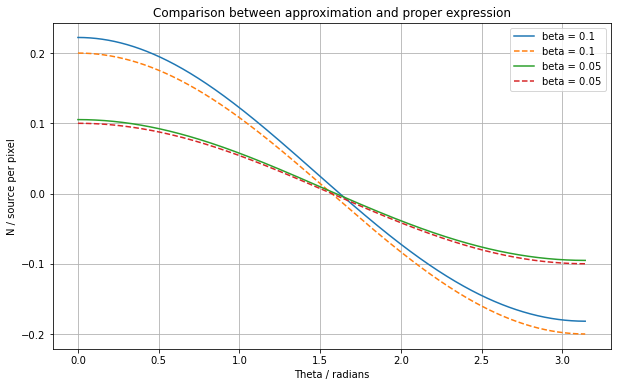

In [43]:
import numpy as np
import matplotlib.pyplot as plt

theta_values = np.linspace(0, np.pi, 1000)
b_values = [0.1, 0.05]

plt.figure(figsize=(10, 6))  # Create a figure
for b in b_values:
    N =  ((1 + b * np.cos(theta_values))**2 / (1 - b**2)) - 1 
    n = (1+2*b*np.cos(theta_values)) - 1
    plt.plot(theta_values, N, label=f'beta = {b}')
    plt.plot(theta_values, n, label=f'beta = {b}', linestyle='dashed')
    
plt.xlabel('Theta / radians')
plt.ylabel('N / source per pixel')
plt.title('Comparison between approximation and proper expression')
plt.legend()
plt.grid(True)
plt.show()


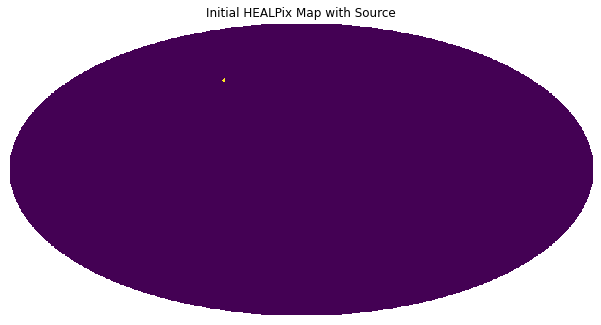

Original theta value:  43.428  Original phi value:  60.517
Aberrated theta value:  39.62  Aberrated phi value:  60.517


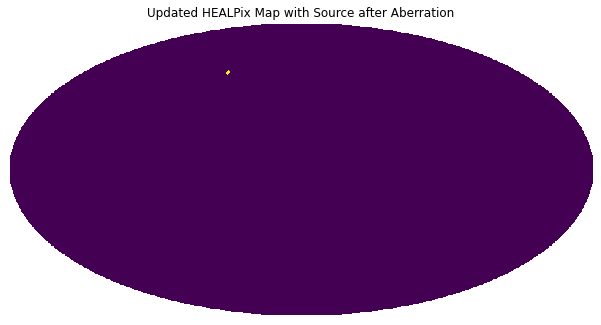

In [4]:
#Aberration of a single source in Healpix
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

nside = 32
npix = hp.nside2npix(nside)

source_map = np.zeros(npix)
source_theta = np.radians(45)
source_phi = np.radians(60)
source_pixel = hp.ang2pix(nside, source_theta, source_phi)
source_map[source_pixel] = 1

hp.mollview(source_map, title='Initial HEALPix Map with Source', cmap='viridis', cbar=False)
hp.graticule
plt.show()

source_theta_original, source_phi_original = hp.pix2ang(nside, source_pixel)

print("Original theta value: ", round(np.degrees(source_theta_original), 3), " Original phi value: ", round(np.degrees(source_phi_original), 3))

def aberrate(theta, phi, velocity):
    # Calculate aberrated theta and phi
    sol = 3 * 10**8
    b = velocity / sol
    
    
    cos_thet1 = (np.cos(theta)+b) / (1+b*np.cos(theta))
    sin_thet1 = np.sqrt(1-b**2) * (np.sin(theta) / (1 + b*np.cos(theta)))
    
    theta_1 = np.arctan2(sin_thet1, cos_thet1)
    phi_1 = phi
    
    return theta_1, phi_1


theta_1, phi_1 = aberrate(source_theta_original, source_phi_original, 3e7)

print("Aberrated theta value: ", round(np.degrees(theta_1), 3), " Aberrated phi value: ", round(np.degrees(phi_1), 3))



source_map_updated = np.zeros(npix)
source_pixel_new = hp.ang2pix(nside, theta_1, phi_1)
source_map_updated[source_pixel_new] = 1


hp.mollview(source_map_updated, title='Updated HEALPix Map with Source after Aberration', cmap='viridis',cbar=False)
hp.graticule
plt.show()


In [24]:
#Code for simple aberration. Velocity along positive Z direction
def aberrate(theta, phi, velocity):
    # Calculate aberrated theta and phi
    sol = 3 * 10**8
    b = velocity / sol
    
    
    cos_thet1 = (np.cos(theta)+b) / (1+b*np.cos(theta))
    sin_thet1 = np.sqrt(1-b**2) * (np.sin(theta) / (1 + b*np.cos(theta)))
    
    theta_1 = np.arctan2(sin_thet1, cos_thet1)
    phi_1 = phi
    
    return theta_1, phi_1

In [25]:
#Code for aberration where we can vary velocity direction
import numpy as np

# Function to normalize vector
def norm(vector):
    magnitude = np.linalg.norm(vector)
    if magnitude == 0:
        return vector
    return vector / magnitude

# Function to aberrate theta and phi values
def aberrate_2(theta, phi, theta_v, phi_v, velocity):
    # Convert velocity direction angles to unit vector
    v_unit = np.array([np.sin(theta_v) * np.cos(phi_v),
                       np.sin(theta_v) * np.sin(phi_v),
                       np.cos(theta_v)])
    v_unit = norm(v_unit)

    aberrated_thetas = []
    aberrated_phis = []

    # Iterate over each theta and phi value
    for t, p in zip(theta, phi):
        # Unit vector of pixel/source
        s_unit = np.array([np.sin(t) * np.cos(p),
                           np.sin(t) * np.sin(p),
                           np.cos(t)])
        s_unit = norm(s_unit)

        cos_alpha = np.dot(v_unit, s_unit)
        alpha = np.arccos(cos_alpha)

        alpha_pri = aberrate(alpha, 0, velocity)[0]

        cos_alpha_vunit = np.multiply(cos_alpha, v_unit)
        u_p = s_unit - (cos_alpha * v_unit)
        u_p = norm(u_p)

        ss_unit = np.cos(alpha_pri) * v_unit + np.sin(alpha_pri) * u_p
        ss_unit = norm(ss_unit)

        theta_1 = np.arccos(ss_unit[2])
        phi_1 = np.arctan2(ss_unit[1], ss_unit[0])

        if phi_1 < 0:
            phi_1 += 2 * np.pi
        elif phi_1 > 2 * np.pi:
            phi_1 -= 2 * np.pi

        aberrated_thetas.append(theta_1)
        aberrated_phis.append(phi_1)

    return aberrated_thetas, aberrated_phis


In [26]:
#Code to generate uniform sources
def generate_uniform_sources(num_sources, nside):
    x = np.random.rand(num_sources)
    theta_orig = np.arccos(1 - 2 * x)
    phi_orig = np.random.rand(num_sources) * 2. * np.pi
    idx = hp.ang2pix(nside, theta_orig, phi_orig)
    return idx, theta_orig, phi_orig


In [ ]:
import numpy as np
import healpy as hp

def generate_uniform_sources(num_sources, nside, filename):
    x = np.random.rand(num_sources)
    theta_orig = np.arccos(1 - 2 * x)
    phi_orig = np.random.rand(num_sources) * 2. * np.pi
    idx = hp.ang2pix(nside, theta_orig, phi_orig)
    
    # Save data to file
    with open(filename, 'w') as file:
        file.write('# Index, Theta, Phi\n')
        for i in range(num_sources):
            file.write(f'{idx[i]}, {theta_orig[i]}, {phi_orig[i]}\n')
    
    print(f'Data saved to {filename}')
    return idx, theta_orig, phi_orig

# Example usage
num_sources = 400000000
nside = 64
filename = 'uniform_sources_data_400mil.txt'
idx, theta_orig, phi_orig = generate_uniform_sources(num_sources, nside, filename)


Data saved to uniform_sources_data_400.txt


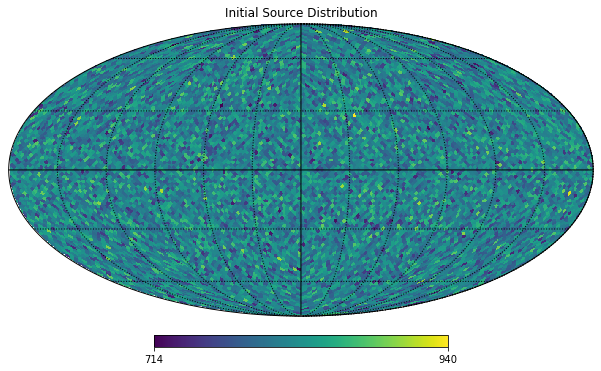

In [3]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

def generate_uniform_sources(num_sources, nside, filename):
    x = np.random.rand(num_sources)
    theta_orig = np.arccos(1 - 2 * x)
    phi_orig = np.random.rand(num_sources) * 2. * np.pi
    idx = hp.ang2pix(nside, theta_orig, phi_orig)
    
    # Save data to file
    with open(filename, 'w') as file:
        file.write('# Index, Theta, Phi\n')
        for i in range(num_sources):
            file.write(f'{idx[i]}, {theta_orig[i]}, {phi_orig[i]}\n')
    
    print(f'Data saved to {filename}')
    return idx, theta_orig, phi_orig

def plot_healpix_map(data, title):
    hp.mollview(data, title=title)
    hp.graticule()
    plt.show()


velocity  = 6e7
filename = 'uniform_sources_data_400.txt'
# Generate random sources and save data
idx, theta_orig, phi_orig = generate_uniform_sources(num_sources, nside, filename)

# Load the data from the file
data = np.loadtxt(filename, delimiter=',', skiprows=1)
loaded_idx, loaded_theta, loaded_phi = data[:, 0].astype(int), data[:, 1], data[:, 2]

# Count how many sources fall into each pixel
count = np.bincount(loaded_idx, minlength=hp.nside2npix(nside))

# Plot the HEALPix map
plot_healpix_map(count, title='Initial Source Distribution')


In [ ]:
# simple Aberration on healpix map
import numpy as np
import healpy as hp

def generate_uniform_sources(num_sources, nside):
    x = np.random.rand(num_sources)
    theta_orig = np.arccos(1 - 2 * x)
    phi_orig = np.random.rand(num_sources) * 2. * np.pi
    idx = hp.ang2pix(nside, theta_orig, phi_orig)
    return idx, theta_orig, phi_orig

num_sources = 400000000 # Adjust as needed
nside = 128 # Adjust as needed
velocity  = 6e7
NPIX = hp.nside2npix(nside)
mean_dens = num_sources / NPIX
# Generate random sources
idx = generate_uniform_sources(num_sources, nside)[0]


# Count how many sources fall into each pixel
count = np.bincount(idx, minlength=hp.nside2npix(nside))

# Plot the HEALPix map
hp.mollview(count, title='Initial Source Distribution')
hp.graticule()
plt.show()

theta_a, phi_a = aberrate(theta_orig, phi_orig, velocity)

ab_idx = hp.ang2pix(nside, theta_a, phi_a)
ab_count = np.bincount(ab_idx,  minlength=hp.nside2npix(nside))

hp.mollview(ab_count, title='Aberrated Source Distribution')
hp.graticule()
plt.show()


Text(0.5, 1.0, 'Original Theta Histogram')

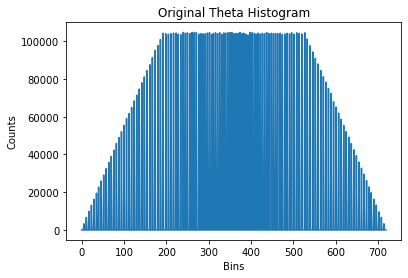

In [20]:
#Histogram of theta distribution
htet=np.histogram(theta_orig, 720, (0, np.pi))
plt.figure()
plt.plot(htet[0])
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Original Theta Histogram')
